In [1]:
# code adapted from: https://www.kaggle.com/code/sonyd4d/cnn-for-emotion-detection/data
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# defining dir variables 
root_dir = os.getcwd()+'/images/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'validation/'

In [2]:
target_var = os.listdir(train_dir)
target_var

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

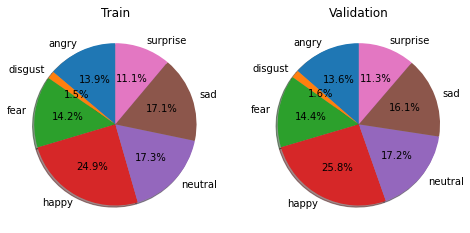

Emotion : angry
	Training : 3993
	 Testing : 960
Emotion : disgust
	Training : 436
	 Testing : 111
Emotion : fear
	Training : 4103
	 Testing : 1018
Emotion : happy
	Training : 7164
	 Testing : 1825
Emotion : neutral
	Training : 4982
	 Testing : 1216
Emotion : sad
	Training : 4938
	 Testing : 1139
Emotion : surprise
	Training : 3205
	 Testing : 797


In [3]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Validation')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using IDG to load images from directory
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
test_idg = ImageDataGenerator(rescale=1./255)

# Specify parameters/arguments for data generation
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 20179 images belonging to 7 classes.
Found 8642 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
